In [1]:
import generator
import utils
import hypotheses
import models

import numpy as np
from scipy import stats

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
n_samples = 50
n_features = 6
dataset = generator.dataset_from_normal(n_samples=n_samples, n_features=n_features, random_seed=42)

Number of samples: 50
Number of features/dimensionality of observation: 5


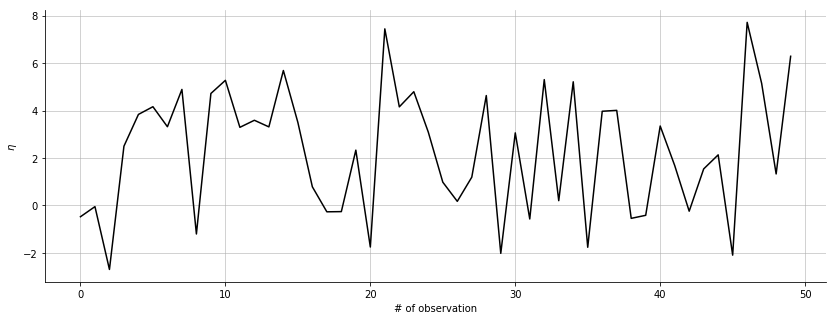

In [3]:
utils.summary(inplace=True, **dataset)

# Корреляции в данных

## Выборочная парная корреляция

### Матрица выборочных парных корреляций

In [4]:
correlation_matrix = utils.get_correlation_matrix(dataset['ksi'])
utils.pretty_print(correlation_matrix, 5)

[[ 1.      -0.1421  -0.33102 -0.01341 -0.03378]
 [-0.1421   1.       0.21995  0.02763 -0.22868]
 [-0.33102  0.21995  1.      -0.02046  0.00605]
 [-0.01341  0.02763 -0.02046  1.       0.19713]
 [-0.03378 -0.22868  0.00605  0.19713  1.     ]]


### Доверительные интервалы для выборочной парной корреляции
Использованы преобразование Фишера и ассимптотический доверительный интервал

$\beta = 1 - \alpha$

In [5]:
ci = utils.pairwise_corr_matrix_ci(correlation_matrix, n_samples, beta=0.9)

r_1_2 = -0.1421 in [-0.36405  0.09799]
r_1_3 = -0.33102 in [-0.52304 -0.10033]
r_1_4 = -0.01341 in [-0.24792  0.22285]
r_1_5 = -0.03378 in [-0.26676  0.2036 ]
r_2_3 = 0.21995 in [-0.01857  0.43113]
r_2_4 = 0.02763 in [-0.20943  0.26109]
r_2_5 = -0.22868 in [-0.43852  0.00946]
r_3_4 = -0.02046 in [-0.25446  0.21621]
r_3_5 = 0.00605 in [-0.22976  0.24108]
r_4_5 = 0.19713 in [-0.04217  0.4117 ]


### Значимость выборочных коэффициентов корреляции
$H_0 : r_{ij}=0$

$H_1 : \bar{H_0}$

Критерий принятия альтернативной гипотезы $|r_{ij}|>th\Big(\dfrac{u_{\alpha}}{\sqrt{n-3}}\Big)$

In [6]:
hypotheses.corr_coef_significance_test(correlation_matrix, n_samples, alpha=0.1)

u_a = 1.6448536269514722
threshold = 0.23542638148599196 



### Тест Пирсона (не стоит применять при размере выборки меньше 500)


In [7]:
utils.pretty_print(hypotheses.pearson_test(dataset['ksi'])[1])

[[False  True False  True  True]
 [ True False  True  True  True]
 [False  True False  True  True]
 [ True  True  True False  True]
 [ True  True  True  True False]]


## Частная парная корреляция

### Матрица частных/очищенных коэффициентов корреляции

In [8]:
partial_correlation_matrix = utils.compute_partial_corr_matrix(correlation_matrix)
utils.pretty_print(partial_correlation_matrix)

[[-1.      -0.08473 -0.30768 -0.00796 -0.0502 ]
 [-0.08473 -1.       0.19176  0.08243 -0.25034]
 [-0.30768  0.19176 -1.      -0.04106  0.04777]
 [-0.00796  0.08243 -0.04106 -1.       0.21046]
 [-0.0502  -0.25034  0.04777  0.21046 -1.     ]]


### Доверительные интервалы частных коэффициентов корреляции

In [9]:
partial_ci = utils.partial_pairwise_corr_matrix_ci(partial_correlation_matrix, n_samples-n_features, beta=0.9)

r_1_2 = -0.08473 in [-0.32285  0.16531]
r_1_3 = -0.30768 in [-0.51198 -0.06364]
r_1_4 = -0.00796 in [-0.25309  0.23829]
r_1_5 = -0.0502 in [-0.29179  0.19848]
r_2_3 = 0.19176 in [-0.05873  0.41602]
r_2_4 = 0.08243 in [-0.16754  0.3208 ]
r_2_5 = -0.25034 in [-0.46512 -0.00215]
r_3_4 = -0.04106 in [-0.28348  0.20717]
r_3_5 = 0.04777 in [-0.2008   0.28958]
r_4_5 = 0.21046 in [-0.0395   0.43184]


### Значимость выборочных коэффициентов корреляции
$H_0 : \rho_{ij}=0$

$H_1 : \bar{H_0}$

Критерий принятия альтернативной гипотезы $|\rho_{ij}|>th\Big(\dfrac{u_{\alpha}}{\sqrt{n-k-1}}\Big)$

In [10]:
hypotheses.corr_coef_significance_test(partial_correlation_matrix, n_samples-n_features+2, alpha=0.1)

u_a = 1.6448536269514722
threshold = 0.24570607001017195 



# Уравнение линейной регрессии

In [11]:
model = models.LinearRegressor()
coefs = model.fit(dataset['ksi'], dataset['eta'])
print('Коэффициенты линейной регрессии:\n', np.squeeze(coefs))

Коэффициенты линейной регрессии:
 [ 2.06990441  2.75516973 -2.14092044  1.00961605  0.76835263 -1.21048889]


### Значимость коэффициентов

$H_0 : \beta_{ij}=0$

$H_1 : \bar{H_0}$

In [12]:
hypotheses.linear_regression_significance_test(model.coefs, model.F_inv, model.rss, n_samples)

p-значения теста на значимость коэффициентов  [5.5857e-11 5.6933e-08 9.6658e-06 1.2689e-02 3.3993e-02 3.9842e-03]
Прохождение теста на значимость коэффициентов [False False False False False False]


## Коэффициент детерминации

In [13]:
model.R2

0.6263847372343576

### Значимость коэффициента детерминации

In [14]:
hypotheses.deteremination_coef_significance_test(n_samples, n_features, model.R2)

p-значение для теста на значимость коэффициента детерминации = 1.703381653768345e-08
можно считать, что гипотеза H_1 : R^2 != 0 верна


## Значение в точке x=0

In [15]:
x0 = np.array([0, 0, 0, 0, 0]).reshape(1, -1)
model.predict(x0)[0, 0]

2.0699044106439626

### Доверительный интервал

In [16]:
utils.pretty_print(
    utils.linear_model_confidence_interval(x0, model.coefs, model.F_inv, model.rss, n_samples, quantile=0.95)[:, 0]
)

[-1.42316  5.56297]


Получился достаточно большим (Может где-то ошибся?)

## Проверка независимости ошибки распределения

In [17]:
hypotheses.randomness_test(model.errors)

p-значение для теста на случайность выборки = 0.284843051281288
можно считать, что гипотеза H_0 : наблюдения случайные верна


## Проверка нормальности распределения ошибок

### 1. Тест [Shapiro-Wilk](http://webspace.ship.edu/pgmarr/Geo441/Readings/Shapiro%20and%20Wilk%201965%20-%20An%20Analysis%20of%20Variance%20Test%20for%20Normality.pdf)

In [18]:
print("W = {0:.4}, p-value = {1:.4}".format(*stats.shapiro(dataset['eta'])))

W = 0.9677, p-value = 0.1866


### 2. Критерий Колмогорова


p-значение для теста на нормальность ошибки = 0.98003
можно принять гипотезу H_0 : ошибки имеют нормальный закон распределения


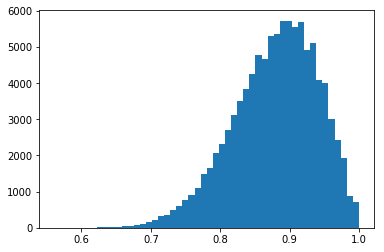

0.98003

In [19]:
hypotheses.Kolmogorov_normality_test(model.errors)

## Кросс-проверка регрессии

In [20]:
print("R*^2 =", utils.cross_validation_loo(dataset['ksi'], dataset['eta']))

R*^2 = 0.9403682895337638


## Проверка адекватности модели

To implement

## Удаление наименее значимой переменной и проверка регрессии

Коэффициент перед $x_4$ оказался наименее значимым

In [28]:
dataset['ksi'][:, (0, 1, 2, 4)].shape

(50, 4)

In [29]:
model2 = models.LinearRegressor()
coefs2 = model2.fit(dataset['ksi'][:, (0, 1, 3, 4)], dataset['eta'])
print('Коэффициенты "исправленной" линейной регрессии:\n', np.squeeze(coefs2))

Коэффициенты "исправленной" линейной регрессии:
 [ 2.11405592  2.44477715 -1.94249089  0.72933046 -1.16235114]


### Значимость коэффициентов регрессии

In [30]:
hypotheses.linear_regression_significance_test(model2.coefs, model2.F_inv, model2.rss, n_samples)

p-значения теста на значимость коэффициентов  [8.6277e-11 5.5397e-07 5.7160e-05 4.8270e-02 7.0913e-03]
Прохождение теста на значимость коэффициентов [False False False False False]


### Коэффициент детерминации

In [31]:
model2.R2

0.5809037312343887

### Значимость коэффициента детерминации

In [32]:
hypotheses.deteremination_coef_significance_test(n_samples, n_features-1, model2.R2)

p-значение для теста на значимость коэффициента детерминации = 4.470589329749734e-08
можно считать, что гипотеза H_1 : R^2 != 0 верна


## Кросс-проверка

In [33]:
print("R*^2 =", utils.cross_validation_loo(dataset['ksi'][:, (0, 1, 3, 4)], dataset['eta']))

R*^2 = 0.893400110225794


## Сравнение уравнений регрессии

In [34]:
_ = hypotheses.two_regression_cmp_test(
    model2.rss, model.rss, 
    n_samples, 
    model2.coefs.shape[0], model.coefs.shape[0])

5.356216577409765 145.26405557598105 129.49976494488024
p-значение для теста на сравнение регрессий = 0.02537805415210151
можно принять гипотезу H_1 : добавление коэффициентов улучшает регрессию
